In [1]:
from urllib.error import HTTPError
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
COUNTRY = 'Spain'
FMT = '%m-%d-%Y'
INITIAL_DATE = '01-22-2020'
SRC = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/' \
      'csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'

def date_range(d1):
    """
    Yields the dates from d1 to now. 
    
    :param d1: Current date.
    :return: 
    """
    now = datetime.now()
    while d1 < now:
        yield d1.strftime(FMT)
        d1 += timedelta(days=1)

def read_df(t, d1):
    """
    Yields a dataframe for each csv file.
    
    :param t: Template.
    :param d1: Date of current csv document
    :return: 
    """
    for d in date_range(d1):
        try:
            df = pd.read_csv(t.format(d))
            df['date'] = [d] * len(df.index)
            yield df
        except HTTPError:
            continue

current = datetime.strptime(INITIAL_DATE, FMT)
df = pd.concat([d for d in read_df(SRC, current)])
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,01-22-2020,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,01-22-2020,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,01-22-2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...
287,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,03-19-2020,49.1900,-2.110
288,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,03-19-2020,18.2000,-66.500
289,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,03-19-2020,-1.4400,15.556
290,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0,03-19-2020,24.2500,-76.000


In [3]:
filter_by_country = df['Country/Region'] == COUNTRY
df_sp = df[filter_by_country]
df_sp

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude
58,NaN,Spain,2/1/2020 2:13,1.0,0.0,0.0,02-01-2020,NaN,NaN
58,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-02-2020,NaN,NaN
60,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-03-2020,NaN,NaN
62,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-04-2020,NaN,NaN
62,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-05-2020,NaN,NaN
62,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-06-2020,NaN,NaN
63,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-07-2020,NaN,NaN
63,NaN,Spain,2020-02-01T23:43:02,1.0,0.0,0.0,02-08-2020,NaN,NaN
54,NaN,Spain,2020-02-09T20:33:03,2.0,0.0,0.0,02-09-2020,NaN,NaN
54,NaN,Spain,2020-02-09T20:33:03,2.0,0.0,0.0,02-10-2020,NaN,NaN


In [4]:
df_sp = df_sp.loc[:,['date','Deaths']]
date = df_sp['date']
df_sp['date'] = date.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("01-01-2020", FMT)).days)
df_sp


,date,Deaths
58,31,0.0
58,32,0.0
60,33,0.0
62,34,0.0
62,35,0.0
62,36,0.0
63,37,0.0
63,38,0.0
54,39,0.0
54,40,0.0


In [5]:
def logistic_model(x, a, b, c):
    """
    Growth of the population of a pathogen agent.
    
    :param x: Time.
    :param a: Refers to the infection speed.
    :param b: Day with the maximum infections occurred.
    :param c: Total number of recorded infected people at the infection's end.
    :return: 
    """
    return c / (1 + np.exp(-(x - b) / a))

x = list(df_sp.iloc[:,0])
y = list(df_sp.iloc[:,1])

fit = curve_fit(logistic_model, x, y, p0=[2, 100, 20000])
a, b, c = fit[0]
a, b, c

(2.372663207953968, 77.76365319332794, 1558.6112204052538)

In [6]:
errors = [np.sqrt(fit[1][i][i]) for i in [0, 1, 2]]
sol = int(fsolve(lambda x : logistic_model(x, a, b, c) - int(c), b))
# Final day of infection
sol

96

In [7]:
def exponential_model(x, a, b, c):
    return a * np.exp(b * (x - c))

exp_fit = curve_fit(exponential_model, x, y, p0=[1, 1, 1], maxfev=5000)
exp_fit

(array([2.46276380e-06, 3.01074412e-01, 1.26836000e+01]),
 array([[1.34578705e+00, 7.80895912e-03, 1.81501473e+06],
        [7.80895965e-03, 9.89426559e-05, 1.05316752e+04],
        [1.81501473e+06, 1.05316745e+04, 2.44784525e+12]]))

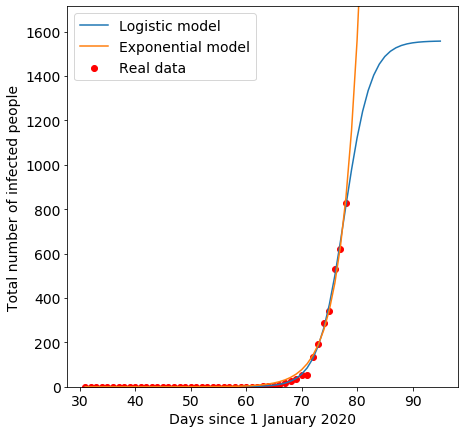

In [8]:
# Plots
pred_x = list(range(max(x), sol))
plt.rcParams['figure.figsize'] = [7, 7]

plt.rc('font', size=14)

# Real data
plt.scatter(x,y,label="Real data",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [
    logistic_model(i,fit[0][0],fit[0][1],fit[0][2])
    for i in x+pred_x], label="Logistic model")

# Predicted exponential curve
plt.plot(x+pred_x, [
    exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2])
    for i in x+pred_x], label="Exponential model" )

plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))

plt.show()

In [9]:
# Analysis of residuals
y_pred_logistic = [
    logistic_model(i, fit[0][0], fit[0][1], fit[0][2])
    for i in x]

y_pred_exp =  [
    exponential_model(i, exp_fit[0][0], exp_fit[0][1], exp_fit[0][2])
    for i in x]

mean_squared_error(y,y_pred_logistic)
mean_squared_error(y,y_pred_exp)

217.33875218485477